## EDEP SIMULATION ANALYSIS ## 

*The objective of this script is to analyze the trajectories for different kinds of events obtained through a Monte-Carlo simulation.*

The data is located in a ".hdf5" file which contains all the raw data in a no array-like structure. The data is set different from each other using the numpy datatype method. The contents of the file have five different kind of main distinc arangements:
- mc_hdr
- mc_stack
- segments
- trajectories
- vertices

On each, the data can be contrasted from other using the dtype method. 

**NOTE**: I'm using the NDLAR simulation converted to hdf5 file from local.

### Let's start the program ###

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
#Let's import the file:
sim_file='/home/enrique/Documents/WorkStuff/Work1/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5'
sim_h5= h5py.File(sim_file,'r')
#And observe the file contents.
print('\n----------------- File content -----------------')
print('File:',sim_file)
print('Keys in file:',list(sim_h5.keys()))
for key in sim_h5.keys():
    print('Number of',key,'entries in file:', len(sim_h5[key]))
print('------------------------------------------------\n')


----------------- File content -----------------
File: /home/enrique/Documents/WorkStuff/Work1/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5
Keys in file: ['mc_hdr', 'mc_stack', 'segments', 'trajectories', 'vertices']
Number of mc_hdr entries in file: 2040
Number of mc_stack entries in file: 19137
Number of segments entries in file: 6582081
Number of trajectories entries in file: 4369814
Number of vertices entries in file: 2040
------------------------------------------------



It's important to clarify that the type of information that is inside this dataset can be understood using:
-   https://github.com/DUNE/2x2_sim/wiki/File-data-definitions


In [2]:
#Let's split the data per key and see what's inside of each 

mc_hdr = sim_h5['mc_hdr']
mc_stack = sim_h5['mc_stack']
segments = sim_h5['segments']
trajectories = sim_h5['trajectories']
vertices= sim_h5['vertices']

#Now let's see what's inside of each:
print("Inside the mc_hdr we find: ")
print(mc_hdr.dtype)
print("")
print("Inside the mc_stack we find: ")
print(mc_stack.dtype)
print("")
print("Inside the segments we find: ")
print(segments.dtype)
print("")
print("Inside the trajectories we find: ")
print(trajectories.dtype)
print("")
print("Inside the vertices we find: ")
print(vertices.dtype)
print("")

Inside the mc_hdr we find: 
{'names': ['event_id', 'vertex_id', 'x_vert', 'y_vert', 'z_vert', 't_vert', 'target', 'reaction', 'isCC', 'isQES', 'isMEC', 'isRES', 'isDIS', 'isCOH', 'Enu', 'nu_4mom', 'nu_pdg', 'Elep', 'lep_mom', 'lep_ang', 'lep_pdg', 'q0', 'q3', 'Q2', 'x', 'y'], 'formats': ['<u4', '<u8', '<f4', '<f4', '<f4', '<f8', '<u4', '<i4', '?', '?', '?', '?', '?', '?', '<f4', ('<f4', (4,)), '<i4', '<f4', '<f4', '<f4', '<i4', '<f4', '<f4', '<f4', '<f4', '<f4'], 'offsets': [0, 8, 16, 20, 24, 32, 40, 44, 48, 49, 50, 51, 52, 53, 56, 60, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112], 'itemsize': 120}

Inside the mc_stack we find: 
{'names': ['event_id', 'vertex_id', 'traj_id', 'part_4mom', 'part_pdg', 'part_status'], 'formats': ['<u4', '<u8', '<i4', ('<f4', (4,)), '<i4', '<i4'], 'offsets': [0, 8, 16, 20, 36, 40], 'itemsize': 48}

Inside the segments we find: 
{'names': ['event_id', 'vertex_id', 'segment_id', 'z_end', 'traj_id', 'file_traj_id', 'tran_diff', 'z_start', 'x_end', 'y_end', 'n_e

If we want to reproduce the results obtained using the "edepdisplay.cpp" code, we would like to focus ond the trajectories to distinguish particles between each other. Also we would like to focus on the deposition of energy on the segments dataset.

In [9]:
# Let's create a dictiorary that will dictate the color assigned to each particle.
# This will come in handy later on the scipt
pdg_color = { 
11 : 'blue', #electron
13 : 'purple', #muon
22 :  'yellow', #gamma
2212:  'black', #proton
2112:  'gray', #neutron
111:   'pink', #pi0
211:   'cyan', #pi+
0: 'red',
11: 'blue', #positron
#14: 'green' # muon neutrino
}
labels = pdg_color.keys()


We'll check the segments dataset. Because the points shown in this dataset are **true** depositions of energy of particles. 

In [10]:
segevent=segments[segments['event_id']==100000]
segevent

array([(100000, 1000000000,     0, 571.8559 ,   12,    12, 0., 571.8562 , 344.5689  , 80.30182 , 0, 11, 344.56915 , 80.302   , 0., 0.19249934, 0.19249939, 0.19249936, 0.00043158, 0., 0, 0., 64.00074  , 0.02762168, 0., 80.30191 , 344.56903 , 571.8561 , 0.),
       (100000, 1000000000,     1, 574.6994 ,   11,    11, 0., 574.6994 , 345.29172 , 80.17872 , 0, 11, 345.29172 , 80.17872 , 0., 0.1924014 , 0.1924014 , 0.1924014 , 0.        , 0., 0, 0.,  0.       , 0.00218394, 0., 80.17872 , 345.29172 , 574.6994 , 0.),
       (100000, 1000000000,     2, 577.9501 ,   10,    10, 0., 577.94965, 344.90445 , 80.28128 , 0, 11, 344.9047  , 80.28189 , 0., 0.19229216, 0.19229224, 0.1922922 , 0.00078401, 0., 0, 0., 50.718826 , 0.03976411, 0., 80.281586, 344.90457 , 577.9498 , 0.),
       ...,
       (100000, 1000000019, 38335, 424.82306, 5945, 26533, 0., 424.68088, 116.373856, 80.302635, 0, 11, 116.3015  , 80.23554 , 0., 9.31314302, 9.31314903, 9.31314602, 0.1730681 , 0., 0, 0.,  2.7072325, 0.46853557, 0.,

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

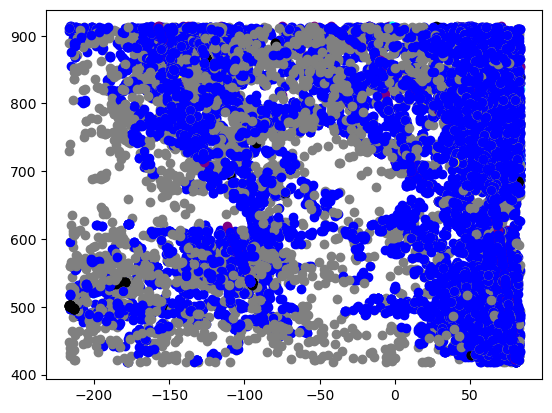

In [14]:
#For now, we'll just see the tracks of particles left in this. We'll plot the lines and also plot the scattered points.

image, ax= plt.subplots()
i=0
for points in segevent:
    
    if np.abs(points['pdg_id']) in labels:
        print(i)
        x_s = [points['y_end']]
        y_s = [points['z_end']]
        ax.scatter(x_s, y_s,c=pdg_color[np.abs(points['pdg_id'])])
        i+=1

plt.show()

In [56]:
muonsegm=segevent[segevent['pdg_id']==13]
print(len(muonsegm['event_id']))
muonsegm

390


array([(100000, 1000000000,   190, 607.3785 , 1,     1, 0., 602.339  ,  331.01627 ,  7.92118073e+01, 0, 13,  332.76175 ,  8.29281998e+01, 0., 0.19226788, 0.19248567, 0.19237677, 6.50036478e+00, 0., 0, 0., 1.9886843, 1.29271736e+01, 0.,  8.10700073e+01,  331.889   , 604.85876, 0.),
       (100000, 1000000000,   191, 607.92255, 1,     1, 0., 607.3785 ,  330.83463 ,  7.88078537e+01, 0, 13,  331.01627 ,  7.92118073e+01, 0., 0.19248567, 0.19250917, 0.19249742, 7.01556206e-01, 0., 0, 0., 1.4781111, 1.03697801e+00, 0.,  7.90098267e+01,  330.92545 , 607.6505 , 0.),
       (100000, 1000000000,   192, 609.10443, 1,     1, 0., 607.92255,  330.43646 ,  7.79276505e+01, 0, 13,  330.83463 ,  7.88078537e+01, 0., 0.19250917, 0.19256031, 0.19253474, 1.52648056e+00, 0., 0, 0., 1.9601005, 2.99205542e+00, 0.,  7.83677521e+01,  330.63556 , 608.5135 , 0.),
       (100000, 1000000000,   193, 609.3976 , 1,     1, 0., 609.10443,  330.33926 ,  7.77097321e+01, 0, 13,  330.43646 ,  7.79276505e+01, 0., 0.19256031, 

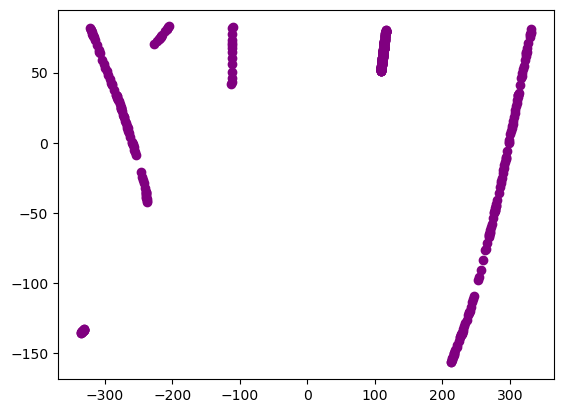

In [57]:
#Positions of the muon
xm=muonsegm['x']
ym=muonsegm['y']
zm=muonsegm['z']
fig, axes = plt.subplots()
axes.scatter(xm,ym,c='purple')

We observe 5 different trajectories for the muon, really distinguishable, let's see if we can get just one of them


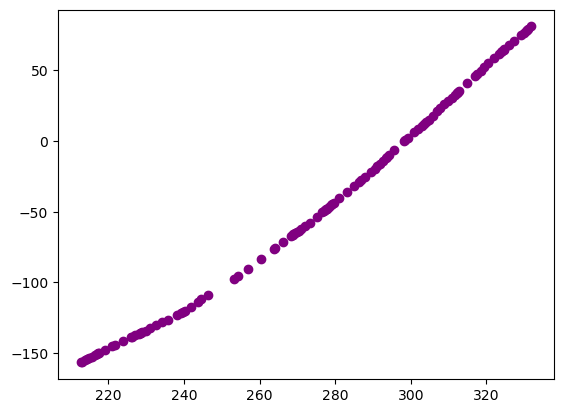

In [58]:
onemuon=muonsegm[muonsegm['vertex_id']==1000000000]
xm=onemuon['x']
ym=onemuon['y']
zm=onemuon['z']
fig, axes = plt.subplots()
axes.scatter(xm,ym,c='purple')

(array([ 2.,  2.,  1.,  3.,  4., 15., 22., 19., 11., 12.,  7.,  5.,  5.,
         1.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.35217083, 1.4195801 , 1.48698938, 1.55439866, 1.62180781,
        1.68921709, 1.75662637, 1.82403564, 1.89144492, 1.9588542 ,
        2.02626348, 2.09367275, 2.16108203, 2.22849131, 2.29590058,
        2.36330986, 2.4307189 , 2.49812818, 2.56553745, 2.63294673,
        2.70035601, 2.76776528, 2.83517456, 2.90258384, 2.96999311]),
 <BarContainer object of 24 artists>)

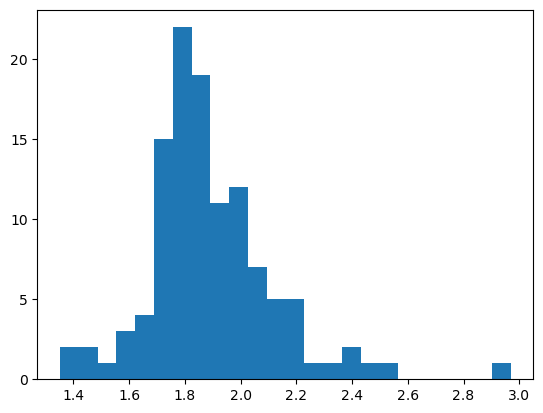

In [59]:
dEdx=onemuon['dEdx']
plt.hist(dEdx,bins=24)

In [52]:
trajE0=trajectories[trajectories['vertex_id']==1000000000]
muontrajs=trajE0[np.abs(trajE0['pdg_id'])==13]
muontrajs

array([(100000, 1000000000, 1, 1, -1,  True, 1278.4069, [-359.2722 , -722.3259 ,  986.06757], [347.4595 , 112.21897, 562.7635 ], 0.19054737, 105.65837, [-0., -0.,  0.], [ 204.42287, -171.13889,  924.12054], 0.20740655, 13, 0, 0, 2, 22, 483.3434)],
      dtype={'names': ['event_id', 'vertex_id', 'traj_id', 'file_traj_id', 'parent_id', 'primary', 'E_start', 'pxyz_start', 'xyz_start', 't_start', 'E_end', 'pxyz_end', 'xyz_end', 't_end', 'pdg_id', 'start_process', 'start_subprocess', 'end_process', 'end_subprocess', 'dist_travel'], 'formats': ['<u4', '<u8', '<u4', '<u4', '<i4', '?', '<f4', ('<f4', (3,)), ('<f4', (3,)), '<f8', '<f4', ('<f4', (3,)), ('<f4', (3,)), '<f8', '<i4', '<u4', '<u4', '<u4', '<u4', '<f4'], 'offsets': [0, 8, 16, 20, 24, 28, 32, 36, 48, 64, 72, 76, 88, 104, 112, 116, 120, 124, 128, 132], 'itemsize': 136})

In [65]:
stack=mc_stack[mc_stack['event_id']==100000]
stack[stack['part_pdg']==13]

array([(100000, 1000000000, 1, [-3.5927219e+02, -7.2232593e+02,  9.8606757e+02,  1.2784069e+03], 13, 1),
       (100000, 1000000009, 0, [-1.0690098e+03, -5.2361084e+02,  5.1532744e+03,  5.2900239e+03], 13, 1),
       (100000, 1000000011, 0, [-2.2044405e+01, -3.4779535e+02,  2.3895355e+02,  4.3555719e+02], 13, 1),
       (100000, 1000000014, 0, [-5.5090192e+02, -3.1844565e+02,  8.4121918e+02,  1.0600537e+03], 13, 1),
       (100000, 1000000016, 0, [ 2.4207733e+02, -3.0537500e+02,  7.0738782e+02,  8.1450391e+02], 13, 1),
       (100000, 1000000017, 1, [ 5.1513306e+02,  1.2312993e+01,  3.7646418e+03,  3.8012109e+03], 13, 1),
       (100000, 1000000019, 0, [-2.7996515e+02, -8.9662671e+02,  1.4604160e+04,  1.4634718e+04], 13, 1)],
      dtype={'names': ['event_id', 'vertex_id', 'traj_id', 'part_4mom', 'part_pdg', 'part_status'], 'formats': ['<u4', '<u8', '<i4', ('<f4', (4,)), '<i4', '<i4'], 'offsets': [0, 8, 16, 20, 36, 40], 'itemsize': 48})

REMEMBER: The squared of the 4-momentum of a particle is constant thru all of the events.